In [52]:
import pandas as pd
from matplotlib import pyplot as plt

#### Funciones utilizadas en los cálculos

In [53]:
#Definiendo la función de Fisher
def fisher(xi:pd.Series,ni:pd.Series) -> float:
    '''Función encargada de cálcular el coeficiente
    de Fisher'''
    sumatoria = 0
    x = xi.mean()
    s_cubo = xi.std()**3
    n = xi.count()
    for i in range(n):
        sumatoria += ni.iloc[i] * (xi.iloc[i]-x)**3
    return sumatoria / (n*s_cubo)


def identificar_outliers(dato, serie_datos:pd.Series) -> bool:
    '''Función encargada de indetificar si un dato es un
    outlier'''
    q1 = serie_datos.loc['25%'] #Cuartil 1
    q3 = serie_datos.loc['75%'] #Cuartil 2
    iqr = q3-q1 #Rango intercuartílico
    min = q1-(1.5*iqr)
    max = q3+(1.5*iqr)
    if dato<min or dato>max:
        return True
    else:
        return False


def curtosis(xi:pd.Series, ni:pd.Series)->float:
    '''Función encargada de cálcular el coeficiente
    de curtosis'''
    sumatoria = 0
    x = xi.mean()
    s_4 = xi.std()**4
    n = xi.count()
    for i in range(n):
        sumatoria += (ni.iloc[i]/n)*(xi.iloc[i]-x)**4
    return (sumatoria/s_4)-3

### **Coeficiente de asimetría de Fisher y coeficiente de curtosis**

**Ejercicio 1:** Con los siguientes datos: 

13.404, 13.443, 13.445, 13.447, 13.449, 13.450, 13.453, 13.455, 13.457, 13.460, 13.465

calcular: la media, varianza, desviación típica y los coeficientes de asimetría de Fisher y coeficiente de Curtosis

**Solución**

In [54]:
datos = pd.Series([13.404, 13.443, 13.445, 13.447, 13.449, 13.450, 13.453, 13.455, 13.457, 13.460, 13.465])

In [55]:
#Cálculo de la media
datos.mean()

13.448000000000002

In [56]:
#Cálculo de la varianza
datos.var()

0.00025640000000000325

In [57]:
#Cálculo de la desviación típica
datos.std()

0.016012495120998577

In [58]:
#Tabla de frecuencias
tabla1_df = pd.DataFrame(datos, columns=['Datos'])
tabla1_df['ni'] = [1,1,2,1,1,1,2,3,1,2,1]
tabla1_df['fi'] = tabla1_df.ni/tabla1_df.ni.count()
tabla1_df

,Datos,ni,fi
0,13.404,1,0.090909
1,13.443,1,0.090909
2,13.445,2,0.181818
3,13.447,1,0.090909
4,13.449,1,0.090909
5,13.450,1,0.090909
6,13.453,2,0.181818
7,13.455,3,0.272727
8,13.457,1,0.090909
9,13.460,2,0.181818


In [59]:
#Calculando el coeficiente de fisher 
fisher(tabla1_df.Datos, tabla1_df.ni)

-1.6602142424981243

In [60]:
#Calculando el coeficiente de curtosis
curtosis(tabla1_df.Datos, tabla1_df.ni)

2.3777293624727243

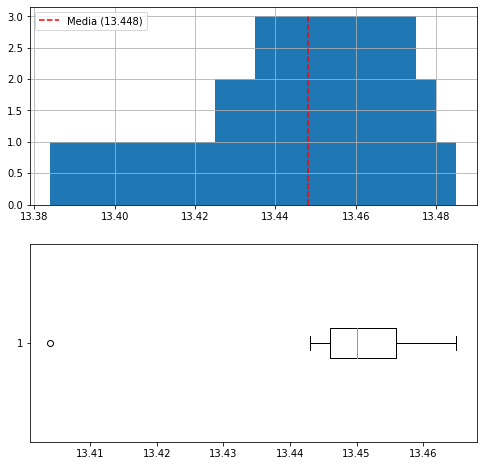

In [81]:
#Graficando la tabla de frecuencia para observar la distribución de los datos
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8,8))
ax[0].bar(tabla1_df.Datos, tabla1_df.ni, width=0.04)
ax[0].vlines(x=tabla1_df.Datos.mean(), ymin=0, ymax=3, color='red', linestyle='--', label='Media ({0:.3f})'.format(tabla1_df.Datos.mean()))
ax[0].grid()
ax[0].legend(loc='upper left')
ax[1].boxplot(tabla1_df.Datos, vert=False)
plt.show()

In [62]:
#Identificando los valores que son outliers
tabla1_df['Outlier'] = tabla1_df.Datos.apply(identificar_outliers, args=(tabla1_df.Datos.describe(),))
tabla1_df

,Datos,ni,fi,Outlier
0,13.404,1,0.090909,True
1,13.443,1,0.090909,False
2,13.445,2,0.181818,False
3,13.447,1,0.090909,False
4,13.449,1,0.090909,False
5,13.450,1,0.090909,False
6,13.453,2,0.181818,False
7,13.455,3,0.272727,False
8,13.457,1,0.090909,False
9,13.460,2,0.181818,False


Eliminando los outliers para comparar los cálculos

In [83]:
sin_outliers1_df = tabla1_df.drop(tabla1_df[tabla1_df.Outlier].index)
sin_outliers1_df

,Datos,ni,fi,Outlier
1,13.443,1,0.090909,False
2,13.445,2,0.181818,False
3,13.447,1,0.090909,False
4,13.449,1,0.090909,False
5,13.450,1,0.090909,False
6,13.453,2,0.181818,False
7,13.455,3,0.272727,False
8,13.457,1,0.090909,False
9,13.460,2,0.181818,False
10,13.465,1,0.090909,False


In [84]:
#Cálculo de la media
sin_outliers1_df.Datos.mean()

13.4524

In [85]:
#Cálculo de la varianza
sin_outliers1_df.Datos.var()

4.826666666667025e-05

In [86]:
#Cálculo de la desviación típica
sin_outliers1_df.Datos.std()

0.006947421584060539

In [87]:
#Tabla de frecuencias
sin_outliers1_df['fi'] = sin_outliers1_df.ni/sin_outliers1_df.ni.count()
sin_outliers1_df

,Datos,ni,fi,Outlier
1,13.443,1,0.1,False
2,13.445,2,0.2,False
3,13.447,1,0.1,False
4,13.449,1,0.1,False
5,13.450,1,0.1,False
6,13.453,2,0.2,False
7,13.455,3,0.3,False
8,13.457,1,0.1,False
9,13.460,2,0.2,False
10,13.465,1,0.1,False


In [88]:
#Calculando el valor de fisher
fisher(sin_outliers1_df.Datos, sin_outliers1_df.ni)

0.35105833822380555

In [89]:
#Calculando el coeficiente de curtosis
curtosis(sin_outliers1_df.Datos, sin_outliers1_df.ni)

-0.9703490430698336

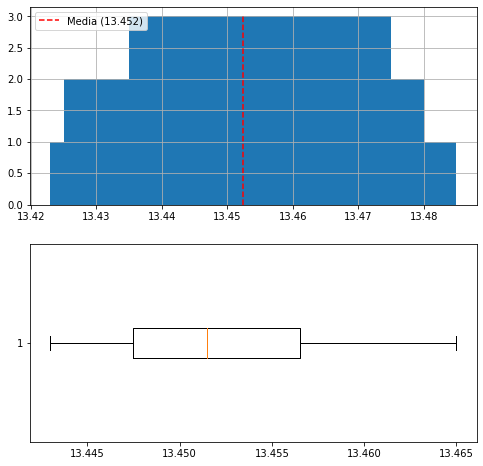

In [90]:
#Graficando la tabla de frecuencia para observar la distribución de los datos
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8,8))
ax[0].bar(sin_outliers1_df.Datos, sin_outliers1_df.ni, width=0.04)
ax[0].vlines(x=sin_outliers1_df.Datos.mean(), ymin=0, ymax=3, color='red', linestyle='--', label='Media ({0:.3f})'.format(sin_outliers1_df.Datos.mean()))
ax[0].grid()
ax[0].legend(loc='upper left')
ax[1].boxplot(sin_outliers1_df.Datos, vert=False)
plt.show()